# TP : Location de vélos en libre-service

L’organisme de gestion d’un système de location de vélos en libre-service (ex: Vélib) cherche à organiser ses équipes de maintenance pour répondre au mieux à la demande de ses clients.
<br> <br> **Votre mission :** <br>
Réaliser un modèle permettant de prédire le nombre de vélos loués par heure

**Objectifs de ce TP :** <br>
* Dérouler la méthodologie du « POC » sur une problématique donnée
* Utiliser les grandes familles d’algorithmes présentées en cours
* Mettre en place les pratiques adaptées pour l’entraînement d’un modèle

**Format du rendu :** <br>
* Le code fourni doit être écrit en Python et en format Jupyter Notebook. ​
* Votre notebook doit contenir du code, du texte et des graphiques. Vous devez envoyer l’export HTML de votre notebook avec toutes les cellules exécutées. Assurez-vous que le fichier produit est lisible.​
* Vous pouvez utiliser n’importe quelle libraire Python que vous jugez nécessaire.​
* Il ne s’agit pas d’une competition de type Kaggle : vous ne serez pas uniquement évalué sur la performance du modèle mais plutôt sur la pertinence et la justification de vos choix ainsi que sur la qualité de vos explications.


Voici un descriptif de l'ensemble des variables :
* *instant* - index du relevé
* *dteday* - date du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *mnth* - mois du relevé (entre 1 et 12)
* *hr* - heure du relevé (entre 0 et 23)
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *weekday* - day of the week
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

## Questions préalables

**1) Quelle famille d’algorithmes semble adaptée à la mission qui vous a été confiée ?**

 Des algorithmes d'apprentissage supervisé, plus précisemment des modèles de régression, semblent les plus adaptées à la mission.

**2) Quelles variables sont susceptibles de constituer une « cible » ?**

Les variables susceptibles de constituer une cible sont :
- count: nombre total de locations
- casual: locations des usagers non abonnés
- registered: locations des usagers abonnés

## Imports

Vous ajouterez les éventuels imports supplémentaires nécessaires à la cellule ci-dessous :

In [280]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

## Extraction et prise en main de la donnée

Dans cette partie, on va commencer par lire les données et vérifier leur intégrité. C'est également le moment de s'assurer qu'on comprend bien l'ensemble des champs que l'on a à disposition. 

In [225]:
df = pd.read_csv("../data/input/velo.csv")
df.head()

,instant,dteday,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,1,0,0,6,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,1,1,0,6,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,1,2,0,6,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,1,3,0,6,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,1,4,0,6,1,9.84,14.395,75.0,0.0,0,1,1


On s'intéresse aux types de nos variables.

In [226]:
df.dtypes

instant         int64
dteday         object
season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

On regarde les statistiques descriptives de nos variables.

In [227]:
df.describe()

,instant,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,15715.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,6.537775,11.546752,0.028770,3.003683,1.425283,20.376474,23.788755,62.774038,12.736540,35.676218,153.786869,189.463088
std,5017.0295,1.106918,3.438776,6.914405,0.167165,2.005771,0.639357,7.894801,8.592511,19.321135,8.196795,49.305030,151.357286,181.387599
min,1.0000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,4.000000,6.000000,0.000000,1.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,10.000000,18.000000,0.000000,5.000000,2.000000,27.060000,31.060000,78.500000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,4.000000,12.000000,23.000000,1.000000,6.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


**3) A partir de ces analyses ainsi que d'analyses additionnelles dont le code sera exécuté ci-dessous, quelles remarques pouvez-vous faire sur la qualité de données ? Le descriptif des variables vous paraît-il complet et exact ?**

Nous avons plus de 1600 valeurs manquantes pour la variables `hum`.

In [228]:
df.isna().sum()

instant          0
dteday           0
season           0
mnth             0
hr               0
holiday          0
weekday          0
weathersit       0
temp             0
atemp            0
hum           1664
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

Cela représente environ 9.57 % de données manquantes.

In [229]:
print(100 * df['hum'].isna().sum() / df['instant'].count() )

9.574774152713044


Toutes les variables sont lues comme numériques, or elles ne le sont pas toutes: </br> 

* instant : il s'agit d'un index
* dteday : c'est une variable de date
* season: c'est une variable qualitative
* mth : qualitative
* hr : qualitative
* weekday : qualitatif

## Préparation

**4) Quelles sont les variables catégorielles ? Les variables numériques ? En complétant le code ci-dessous, vous vous assurerez du bon typage de la donnée à traiter.**

Pour se faciliter la lecture et le travail sur le jeu de données, on va renommer nos variables ainsi que leurs catégories pour celles qui en ont.

In [230]:
# Renommage des colonnes en français pour une lecture plus claire
nouveaux_noms = {
    "instant": "index",
    "dteday": "date",
    "season": "saison",
    "mnth": "mois",
    "hr": "heure",
    "holiday": "vacances_scolaires",
    "weekday": "jour_semaine",
    "weathersit": "meteo",
    "temp": "temperature",
    "atemp": "temperature_ressentie",
    "hum": "humidite",
    "windspeed": "vitesse_vent",
    "casual": "locations_non_abonnes",
    "registered": "locations_abonnes",
    "cnt": "locations_totales"
}

df = df.rename(columns=nouveaux_noms)

On retrouve ici les variables catégorielles

In [231]:
cat_vars = [
    "saison",   # saison
    "mois",     # mois
    "heure",       # heure
    "vacances_scolaires",  # vacances scolaires
    "jour_semaine",  # jour de semaine
    "meteo"   # conditions météo
]

# Typage des variables catégorielles
for c in cat_vars:
    df[c] = df[c].astype("category")

Pour les variables catégorielles, on veut modifier les noms des catégories pour les mêmes raisons.

In [232]:
# Remappage des valeurs des catégories en français lisible
# Saison
df['saison'] = df['saison'].map({1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'})

# Jour de semaine
df['jour_semaine'] = df['jour_semaine'].map({0: 'dimanche', 1: 'lundi', 2: 'mardi', 3: 'mercredi', 4: 'jeudi', 5: 'vendredi', 6: 'samedi'})

# Vacances scolaires
df['vacances_scolaires'] = df['vacances_scolaires'].map({0: 'non', 1: 'oui'})

# Météo
df['meteo'] = df['meteo'].map({1: 'dégagé_nuageux', 2: 'brouillard', 3: 'légère_pluie_neige', 4: 'fortes_averses'})

On a une variable date que l'on va passer en format datetime

In [233]:
# Conversion de la date
df["date"] = pd.to_datetime(df["date"], errors="coerce")

Dans le cadre de ce TP, nous définissons le nombre total de locations comme notre variable cible. Une approche plus fine aurait consisté à modéliser séparément les abonnés et les non-abonnés pour reconstituer le total, mais par souci de simplification et de temps, nous excluons ces deux variables du jeu de données.

In [234]:
df = df.drop(columns=['locations_abonnes', 'locations_non_abonnes'])

On supprime la variable index qui n'apporte aucune information

In [235]:
df = df.drop(columns=['index'])

Et on va s'assuré également que nos variables numériques sont au bon format

In [236]:
# Variables numériques : tout sauf les catégorielles et la date
num_vars = [c for c in df.columns if c not in cat_vars + ["date"]]

# Aperçu des variables
{"num_vars": num_vars}

{'num_vars': ['temperature',
  'temperature_ressentie',
  'humidite',
  'vitesse_vent',
  'locations_totales']}

Voici maintenant le nouveau type de nos variables

In [237]:
df.dtypes

date                     datetime64[ns]
saison                         category
mois                           category
heure                          category
vacances_scolaires             category
jour_semaine                   category
meteo                          category
temperature                     float64
temperature_ressentie           float64
humidite                        float64
vitesse_vent                    float64
locations_totales                 int64
dtype: object

On regarde également notre nouveau describe, qui est donc plus pertinent

In [238]:
df.describe()

,date,temperature,temperature_ressentie,humidite,vitesse_vent,locations_totales
count,17379,17379.000000,17379.000000,15715.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,20.376474,23.788755,62.774038,12.736540,189.463088
min,2011-01-01 00:00:00,0.820000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,13.940000,16.665000,48.000000,7.001500,40.000000
50%,2012-01-02 00:00:00,20.500000,24.240000,63.000000,12.998000,142.000000
75%,2012-07-02 00:00:00,27.060000,31.060000,78.500000,16.997900,281.000000
max,2012-12-31 00:00:00,41.000000,50.000000,100.000000,56.996900,977.000000
std,NaN,7.894801,8.592511,19.321135,8.196795,181.387599


En observant l'évolution de l'humidité dans le temps, on constate une forte continuité, ce qui justifie d'imputer les valeurs manquantes par interpolation

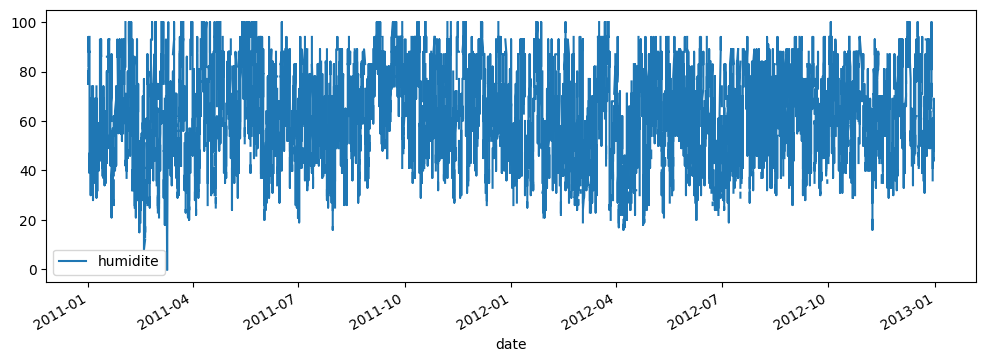

In [239]:
df['date'] = pd.to_datetime(df['date'])
df.plot(x='date', y='humidite', figsize=(12, 4))

plt.show()

Nous considérons les valeurs d'humidité à 0 comme des valeurs aberrantes. Elles sont donc traitées comme des valeurs manquantes et interpolées, au même titre que les NA existants.

In [240]:
df['humidite'] = df['humidite'].interpolate(method='linear')

C'est bon on a plus de valeurs manquantes

In [241]:
df.isna().sum()

date                     0
saison                   0
mois                     0
heure                    0
vacances_scolaires       0
jour_semaine             0
meteo                    0
temperature              0
temperature_ressentie    0
humidite                 0
vitesse_vent             0
locations_totales        0
dtype: int64

## Exploration

**5) Que pouvez-vous analyser à partir des graphiques ci-dessous ?**

Ce graphique représente la moyenne de vélos loués par jour. On peut voir qu'il y a une influence du jour de la semaine, sur le nombre de vélo loués en moyenne:

* jeudi et vendredi: les deux jours avec la moyenne la plus élevées
* mardi, mercredi et samedi: juste en dessous
* lundi: moins de locations encore
* dimanche: le jour avec le moins de locations

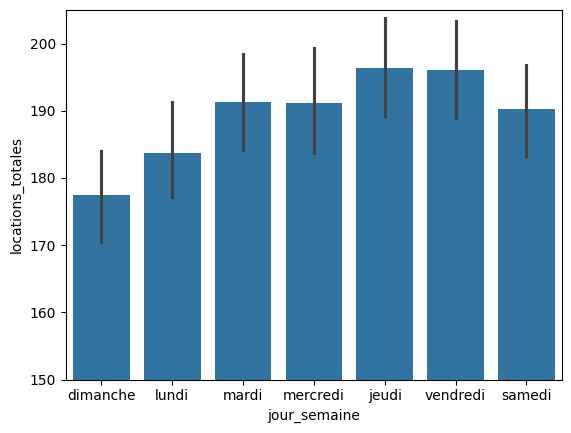

In [242]:
sns.barplot(x="jour_semaine", y="locations_totales", data=df, estimator=np.mean)
plt.ylim(150,205)
plt.show()

Ici on représente le nombre median de vélos loués en fonction du jour de la semaine. On voit qu'il ya une différence par rapport au graphique précedent, notamment que le jeudi a une mediane inferieure à vendredi alors que pour la moyenne c'était l'inverse. Cela peut signifier par exemple qu'il ya des valeurs extrêmes plus grandes le vendredi que le jeudi.

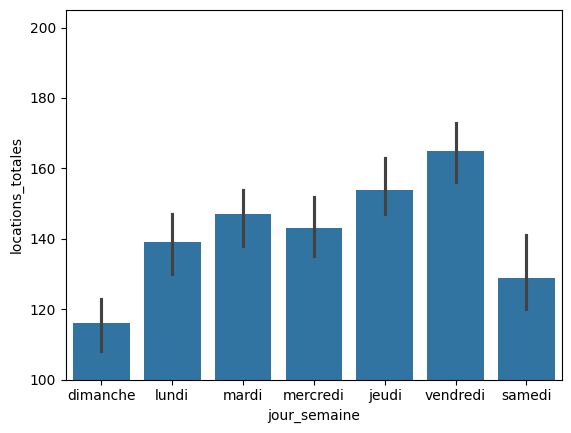

In [243]:
sns.barplot(x="jour_semaine", y="locations_totales", data=df, estimator=np.median)
plt.ylim(100,205)
plt.show()

On réprésente ici le nombre médian de vélos loués en fonction de l'heure de la journée. On obeserve 2 pics dans la journées, qui correspondent aux horaires dites de "bureaux". 

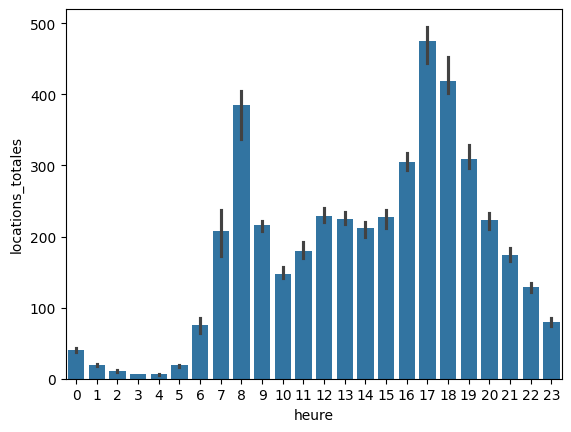

In [244]:
sns.barplot(x="heure", y="locations_totales", data=df, estimator=np.median)
plt.show()

Ici on représente le nombre moyen de vélos loués par heure en fonction du jour de la semaine. On remarque que la tendance est différente entre les jours de la semaine et ceux du week-end. Donc les comportements des loueurs de vélos sont différents.

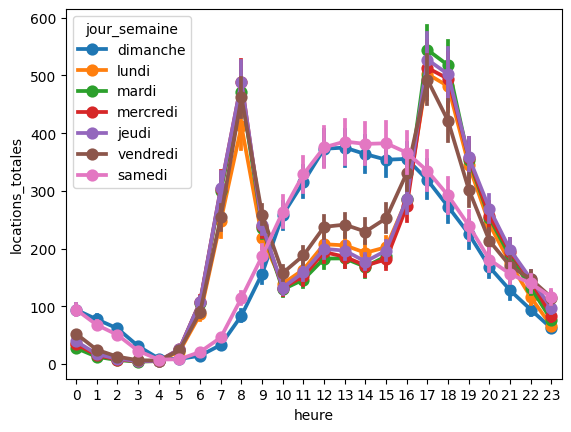

In [245]:
sns.pointplot(data=df, x='heure', y='locations_totales', hue='jour_semaine')
plt.show()

Ici on représente le nombre median de vélos loués en fonction de la température extérieure. On voit que jusqu'à l'intervalle 30-35 degrès, plus il fait chaud plus le nombre de location augmente, ensuite il ne croît plus. 

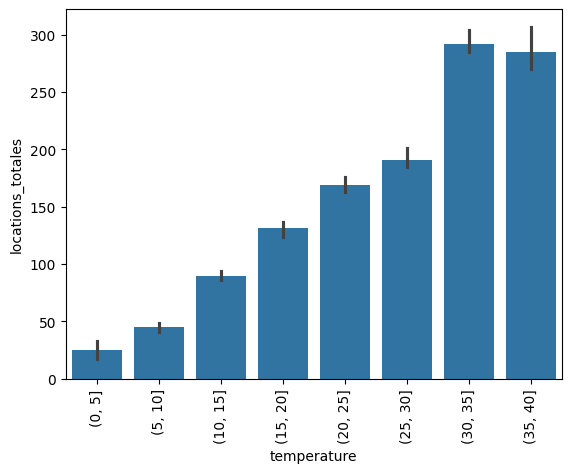

In [246]:
temp_range = range(0, round(df["temperature"].max()), 5)
temp_binned = pd.cut(df["temperature"], bins=temp_range)
temp_plot = sns.barplot(x=temp_binned, y=df["locations_totales"], estimator=np.median)
plt.xticks(rotation=90)
plt.show()

**6) Montrez des graphiques supplémentaires pertinents vous permettant de mieux comprendre les facteurs d'impact sur le nombre de vélos loués. Pour chacun de ces graphiques vous proposerez une analyse.**

Tout d'abord nous allons regarder la fonction de répartition de notre variable de locations totales

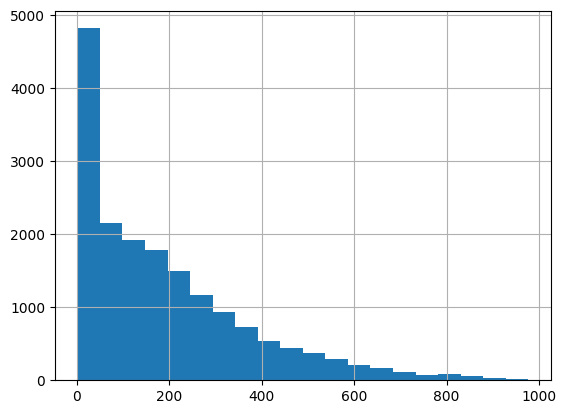

In [247]:
df['locations_totales'].hist(bins=20)

plt.show()

On observe une distribution asymétrique à droite

On souhaite observer le nuage de points entre notre variable cible locations totales et les variables numériques, on trace également la droite de régression linéaire entre les 2.

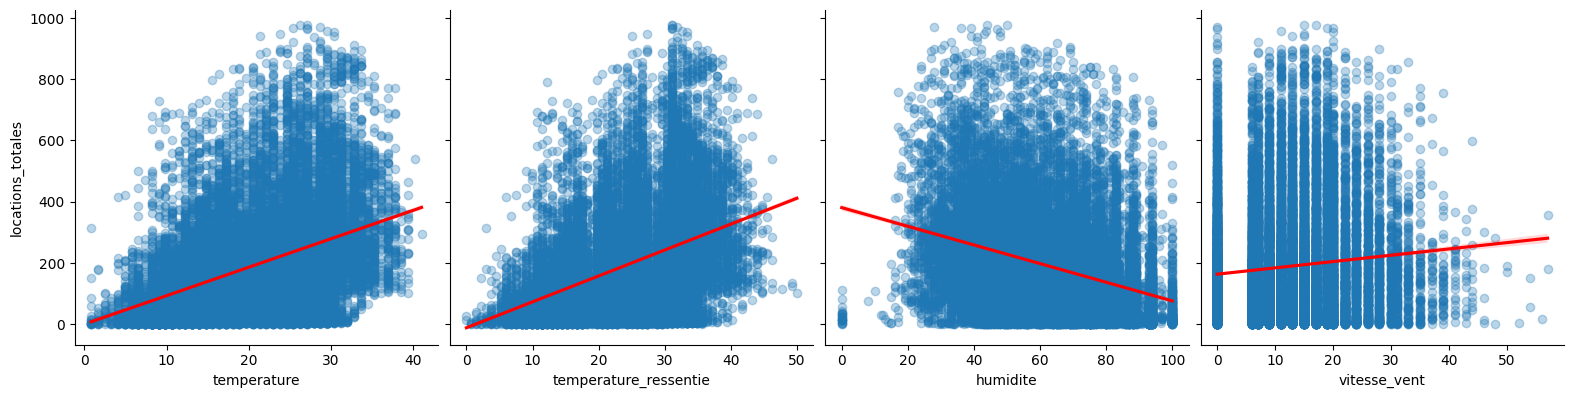

In [248]:
# pairplot génère une grille de graphiques

sns.pairplot(
    data=df,
    x_vars=[var for var in num_vars if var != 'locations_totales'],               # Vos variables explicatives
    y_vars=['locations_totales'], # Votre variable cible
    kind='reg',                  # Ajoute la droite de régression
    height=4,                    # Taille des graphiques
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.3}} # Vos styles
)

Nous pouvons faire une analyse pour chacun de ces nuages de points:

- Temperature et Temperature ressentie:
La ligne rouge monte nettement. Il y a une corrélation positive forte. Plus il fait chaud, plus il y a de locations.

- Humidité:
La ligne rouge descend. C'est une corrélation négative. L'humidité fait baisser le nombre de locations.

- Vitesse du vent:
La droite monte très légèrement, cela ne semble pas très corrélé.

Nous souhaitons observer les liens entre les variables numériques ; pour cela, nous affichons la matrice de corrélation.

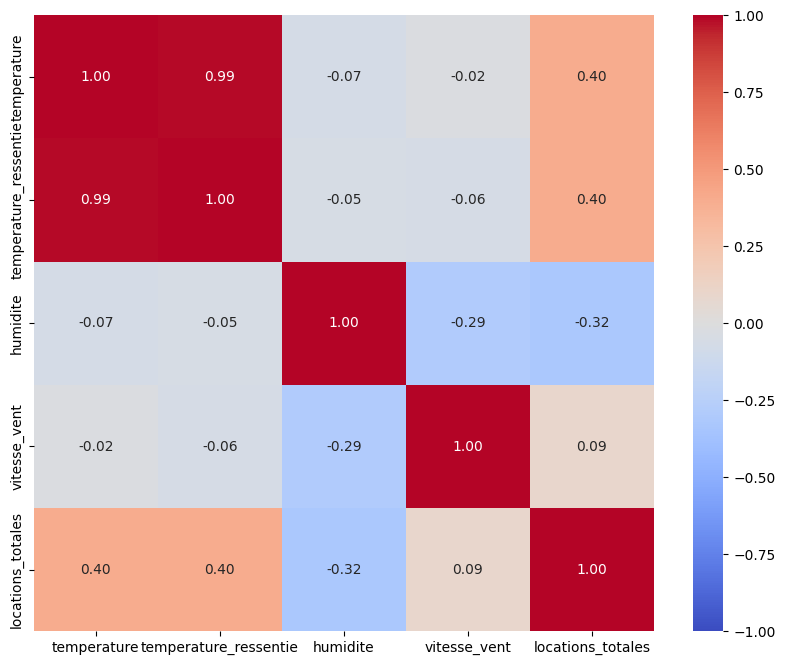

In [249]:
corr = df[num_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True,      
            cmap='coolwarm', 
            fmt=".2f",       
            vmin=-1, vmax=1) 

plt.show()

La matrice confirme une forte colinéarité entre la température et la température ressentie, rendant l'une des deux redondante. On observe également une corrélation négative significative entre l'humidité et le nombre de locations. En revanche, la vitesse du vent présente un coefficient proche de zéro, indiquant un faible pouvoir prédictif.

On souhaite maintenant étudier l'impact de nos variables catégorielles sur notre variable location

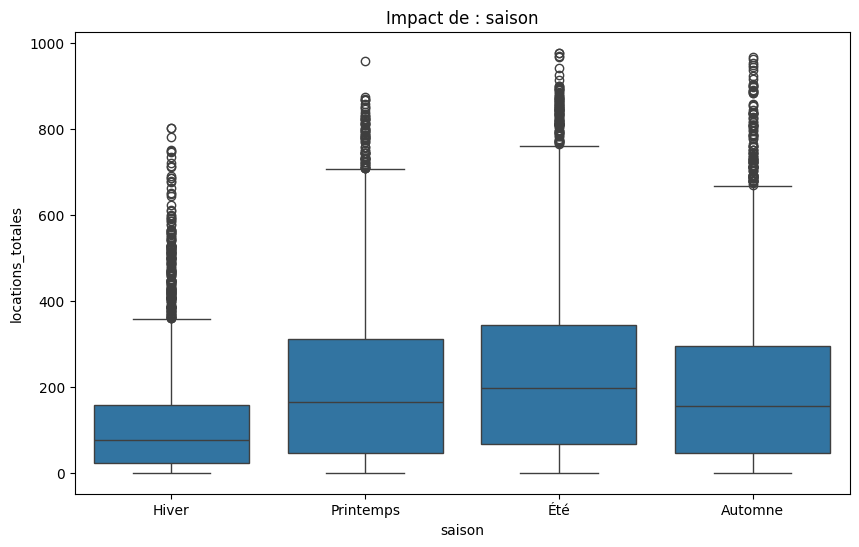

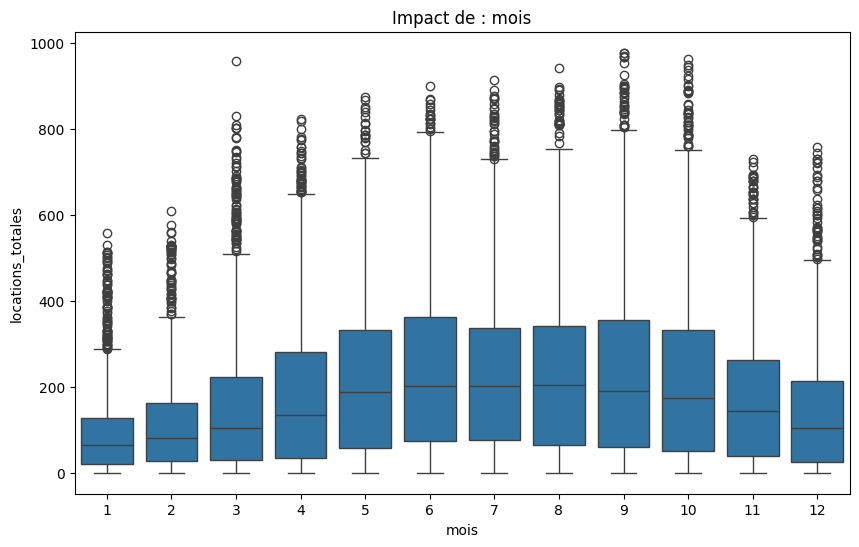

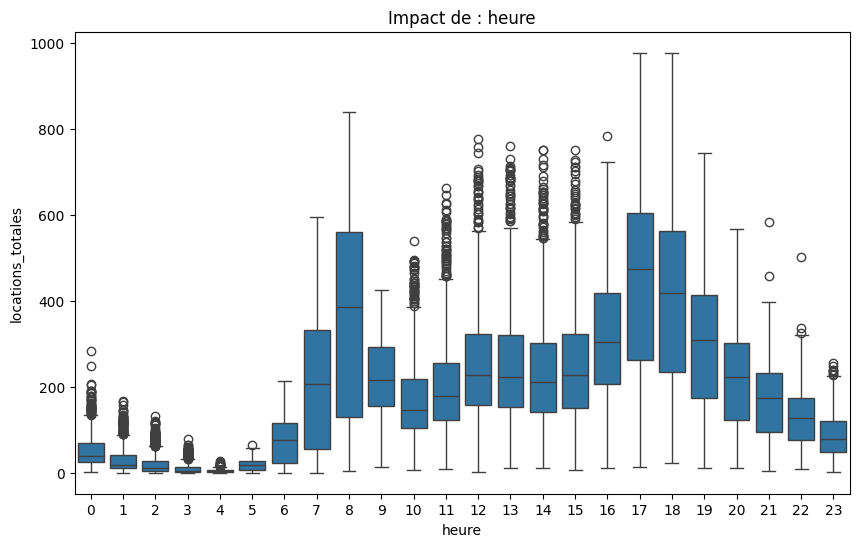

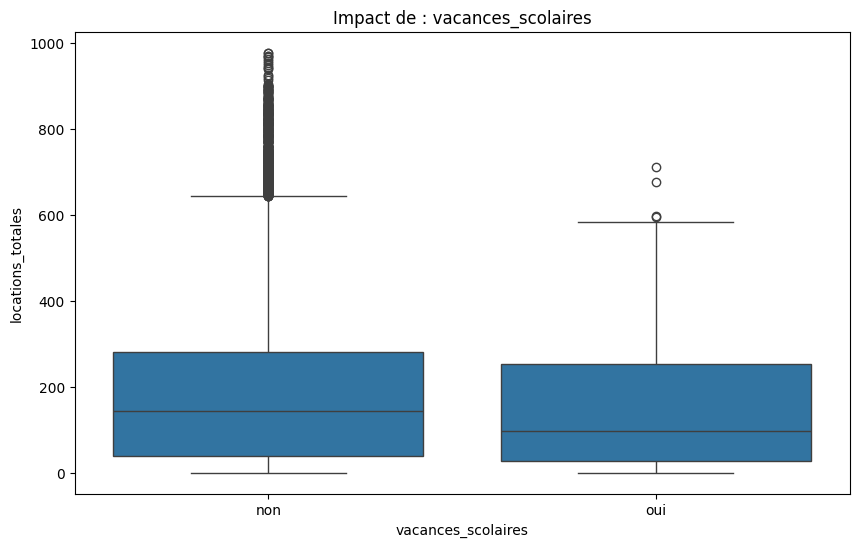

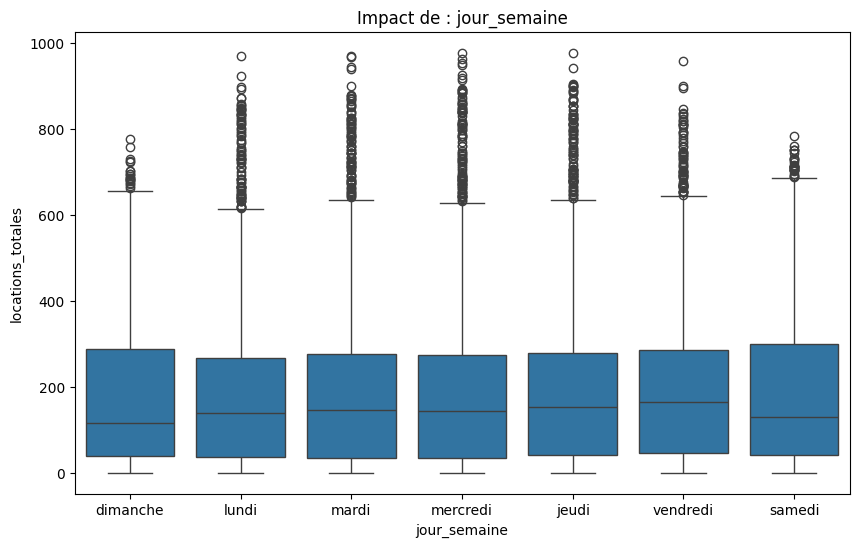

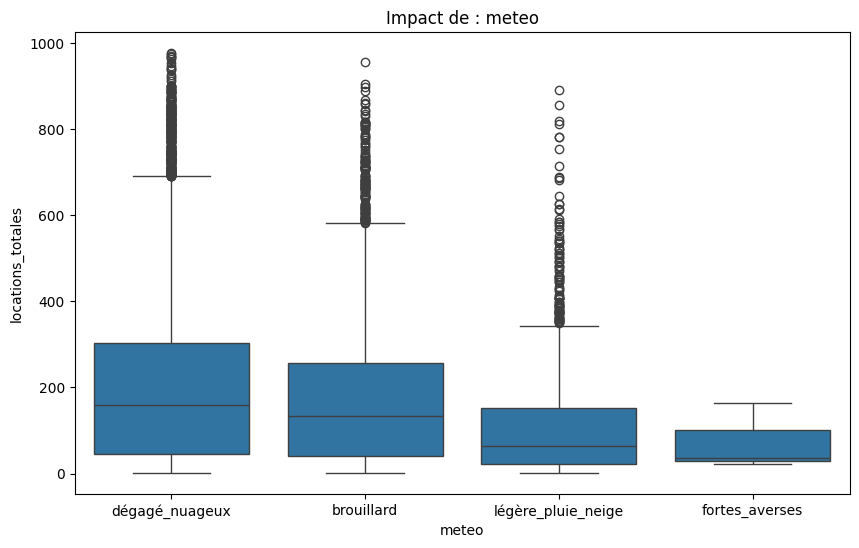

In [250]:
for cat in cat_vars:
    plt.figure(figsize=(10, 6)) # Taille confortable
    
    # Le Boxplot permet de comparer les distributions
    sns.boxplot(data=df, x=cat, y='locations_totales')
    
    plt.title(f"Impact de : {cat}")
    plt.show()

Grâce à ces boxplots on peut sortir des facteurs qui semblent déterminants:
- Heure: On voit 2 pics très nets
- Météo: Le mauvais temps est un frein
- Heure et Mois: les deux variables nous montrent des périodes fortes et une influence de la période de l'année

Onn retrouve également des variables à faible impact:
- Vacances scolaire: variable peu discriminante
- Jour de la semaine: boxplot quasi identique, mais attention ici on ne peut pas voir si croisé avec "Heure" on ne verrait une réelle différence

**7) Proposez une visualisation pertinente à partir d'une approche non-supervisée**

Nous allons projeter nos données pour essayer de voir si des groupes se forment, on va utiliser l'ACP

On ne garde que nos données numériques et on standardise nos données

In [251]:
X_num = df[num_vars]

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

On peut maintenant calculer l'ACP, avec 2 dimensions afin de représenter graphiquement notre approche

In [252]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X_num_scaled)

Et enfin on peut faire notre dessin

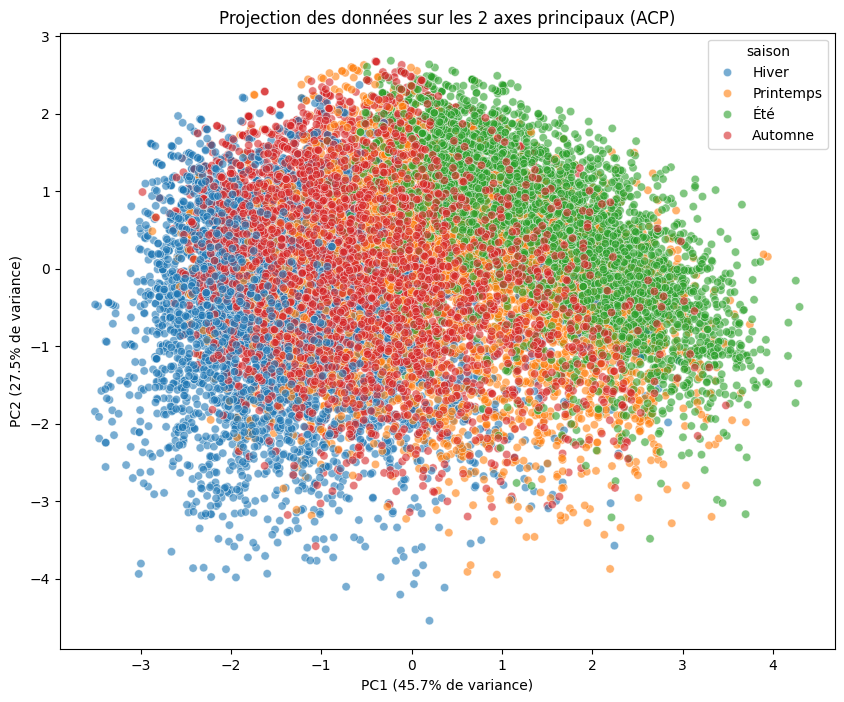

In [253]:
df_pca = pd.DataFrame(data=coords, columns=['PC1', 'PC2'])

df_pca['saison'] = df['saison'].values

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='saison', alpha=0.6)

plt.title("Projection des données sur les 2 axes principaux (ACP)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} de variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} de variance)")
plt.show()

## Feature Engineering

**8) Ajoutez à ce dataset une "feature" qui vous semble pertinente. Comment pouvez-vous évaluer l'apport potentiel de cette feature ? Montrez les graphiques ou tableaux pertinents pour appuyer votre réponse.**

Nous allons observer le croisement entre la variable heure et le jour de la semaine

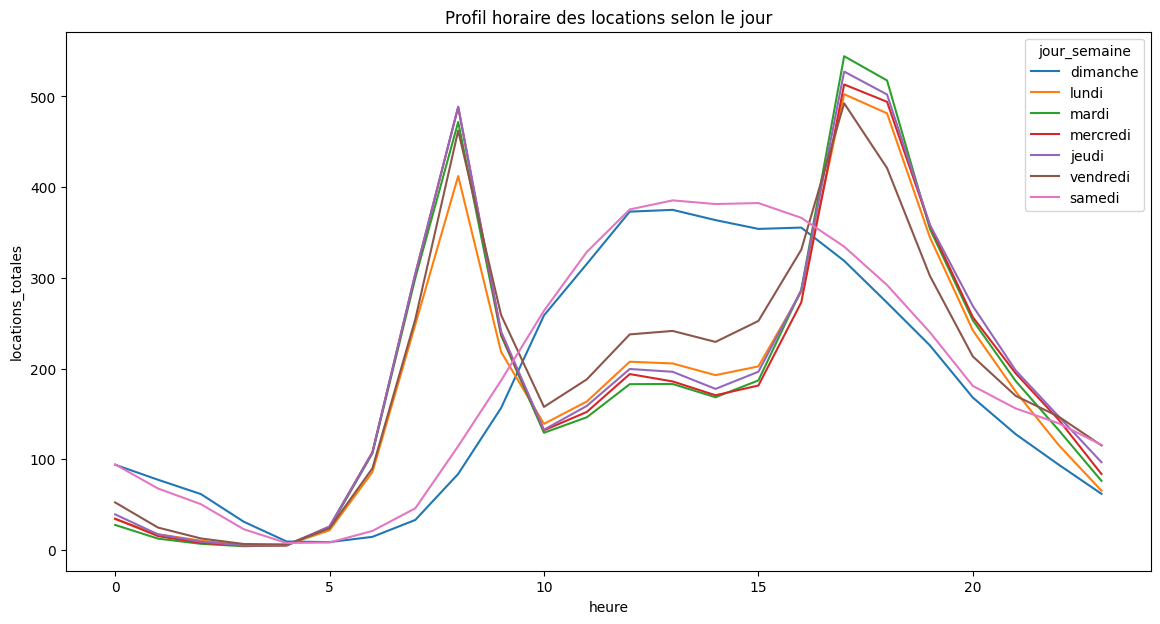

In [254]:
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=df, 
    x='heure', 
    y='locations_totales', 
    hue='jour_semaine', 
    errorbar=None       
)

plt.title("Profil horaire des locations selon le jour")
plt.show()

Nous identifions deux profils temporels distincts :
- En semaine : Une courbe avec deux pics nets, trajets domicile - travail
- Le week-end : Une courbe en forme de cloche, plus d'activité en milieu de journée

On décide donc de créer une nouvelle feature, afin de dire s'il s'agit d'un jour de semaine ou un jour de week-end 

In [255]:
df['est_weekend'] = df['jour_semaine'].isin(['samedi', 'dimanche']).astype('category')

Nous projetons les heures et les mois sur un cercle trigonométrique. Cela donne un sens mathématique à la répétition du temps : le modèle comprend ainsi que 23h et 0h sont voisins, tout comme décembre et janvier.

In [256]:
df['mois'] = df['mois'].astype(int)
df['heure'] = df['heure'].astype(int)

df['mois_sin'] = np.sin(2 * np.pi * df['mois'] / 12)
df['mois_cos'] = np.cos(2 * np.pi * df['mois'] / 12)

df['heure_sin'] = np.sin(2 * np.pi * df['heure'] / 24)
df['heure_cos'] = np.cos(2 * np.pi * df['heure'] / 24)

On veut transformer les variables catégorielles en colonnes numériques 0 ou 1, car nos modèles peuvent avoir besoin de nombre pour lire nos variables

In [257]:
df = pd.get_dummies(df, columns=['saison', 'meteo'], drop_first=True, dtype=int)

## Algorithmes et Validation (entraînement de l'algorithme prédictif)

Dans cette partie, vous allez entraîner un modèle prédictif pour prédire le nombre total de locations de vélos. **Utilisez la librairie sklearn** et lisez attentivement la documentation des fonctions que vous serez amenés à choisir. De manière générale, **commencez simple** et vous pourrez améliorer votre modèle dans la partie suivante, ou donner vos pistes de réflexion à la fin de ce TP.

**9) Séparez au sein du dataset vos jeux d'entraînement et de test. A quoi cette étape sert-elle ?**

On définit la liste des features que l'on va prendre dans notre modèle

In [258]:
features = [
    'temperature',
    'humidite',
    'heure_sin',
    'heure_cos',
    'mois_sin',
    'mois_cos',
    'est_weekend',
    'saison_Printemps',
    'saison_Été',
    'saison_Automne',
    'meteo_brouillard',
    'meteo_légère_pluie_neige',
    'meteo_fortes_averses'
]

X = df[features]
y = df['locations_totales']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Éviter le surapprentissage. Un modèle a qui on demande de prédire des données avec lesquelles il a appris , ce n'est pas correct. On veut un modèle capable de généraliser sur des données qu'il ne connaît pas.

**10) Choisissez un modèle et indiquez les raisons de ce choix. Si des pré-traitements spécifiques sont nécessaires à la bonne exécution et performance de l'algorithme, vous les effectuerez ici en indiquant pourquoi ils sont nécessaires. Vous pourrez ensuite procéder à l'entraînement de votre modèle à l'aide de la fonction *fit* présente sur l'ensemble des estimateurs sklearn**

Nous souhaitons faire une régression linéaire multiple, pour cela on va mettre toutes les variables à la même échelle pour pas que le modèle accorde une importance disproportionnée aux variables avec de grandes valeurs.

In [262]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

On peut initialiser notre modèle

In [265]:
model = LinearRegression()

On passe maintenant à l'entraînement

In [266]:
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


**11) Ce premier modèle est-il performant ? Comment mesurez-vous sa performance et pourquoi ?**

On va prédire avec notre modèle sur le jeu de test

In [267]:
y_pred = model.predict(X_test_scaled)

Maintenant on peut calculer les scores de performances avec le R² et la RMSE

In [270]:
score_r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

On utilise le R-carré, c'est un score entre 0 et 1 qui correspond à un coéfficient de détermination. C'est à dire le taux de variations expliqué de la variable cible par nos variables explicatives.

La RMSE c'est l'erreur moyenne de notre prédiction sur la variable cible.

In [271]:
print(f"--- Performance du modèle ---")
print(f"R² (Score global) : {score_r2:.3f}")
print(f"RMSE (Erreur moyenne) : {rmse:.1f} vélos")
print(f"Moyenne réelle des locations : {y_test.mean():.1f} vélos")

--- Performance du modèle ---
R² (Score global) : 0.453
RMSE (Erreur moyenne) : 131.6 vélos
Moyenne réelle des locations : 185.0 vélos


Le modèle de Régression Linéaire présente une performance modeste ($R^2 = 0.45$). Il souffre de sous-apprentissage : sa simplicité l'empêche de capturer les variations complexes de la demande, notamment les pics horaires très marqués. L'erreur moyenne (RMSE) est trop élevée par rapport au volume habituel de locations pour que ce modèle soit bon.

## Améliorer le modèle

**12) Quelles données supplémentaires permettraient d’avoir une prédiction plus précise ? De quelles données aurait-on besoin pour assurer la maintenance complète des bornes de location ?**

Il nous faudrait des données qui rajoute du contexten notamment des évènements exceptionnels qui expliquerait mieux les valeurs extrêmes, qui ne sont pas expliqués par nos variables actuelles.

**13) Mettez en place les techniques de régularisation adaptées à l’algorithme choisi**

Nous appliquerons d'abord une régularisation Ridge pour stabiliser les coefficients face aux corrélations (multicolinéarité), puis une régularisation Lasso pour effectuer une sélection automatique des variables en éliminant celles qui sont superflues.

In [277]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"--- RIDGE ---")
print(f"R² Ridge : {r2_ridge:.4f}")

--- RIDGE ---
R² Ridge : 0.4532


In [278]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\n--- LASSO ---")
print(f"R² Lasso : {r2_lasso:.4f}")
print(f"Nombre de variables supprimées (coeff=0) : {np.sum(lasso_model.coef_ == 0)}")


--- LASSO ---
R² Lasso : 0.4536
Nombre de variables supprimées (coeff=0) : 0


On a pas eu d'amélioration car notre modèle etait déjà en sous-apprentissage

**14) Mettez en place le choix des meilleurs hyperparamètres**

On définit le modèle à optimiser

In [279]:
model = Ridge()

Ici, on teste des valeurs très petites à très grandes

In [281]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100, 200, 500]
}

On configure la recherche
cv=5 : On découpe en 5 parts pour valider

In [282]:
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='r2'
)

On lance la recherche

In [283]:
grid_search.fit(X_train_scaled, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Ridge()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': [0.01, 0.1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter indexes are also d

Résultats

In [284]:
print(f"Meilleur paramètre trouvé : {grid_search.best_params_}")
print(f"Meilleur score R² (sur la validation) : {grid_search.best_score_:.4f}")

Meilleur paramètre trouvé : {'alpha': 100}
Meilleur score R² (sur la validation) : 0.4451


**15) Quelle(s) autre(s) approche(s) aurait pu être pertinente(s) ? Vous pourrez indiquer ici les pistes d'améliorations que vous envsageriez si vous étiez amené à poursuivre ce projet**

1 - Changer de famille d'algorithmes

La Régression Linéaire est trop rigide. Elle suppose que l'impact de la température est constant. 

Une alternative serait les méthodes ensemblistes à base d'arbres de décision (Random Forest ou XGBoost).

Pourquoi ? Ces modèles gèrent naturellement les effets de seuil et les interactions complexes (ex: "S'il pleut ET qu'on est dimanche, alors demande nulle", ce que la régression linéaire peine à faire). Ce sont les standards actuels pour ce type de données tabulaires.

2. Adopter une approche "Série Temporelle"

Nous avons traité chaque ligne comme si elles étaient indépendantes. Mais le nombre de locations à 18h dépend fortement de ce qu'il s'est passé à 17h.

On pourrait donc créer des variables "retardées" (Lag Features).

Exemple : Ajouter une colonne locations_heure_precedente ou locations_meme_heure_hier.